In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Limpieza

In [57]:
data = pd.read_csv('data/encuesta_raw.csv')
# remover respuesta de prueba
data = data[~(data['Id'] == 1)]
# remover columnas innecesaias
data.drop(['Email', 'Name'], axis=1, inplace=True)

# renombrar las columnas
data.rename(columns={
    'Id': 'response_id',
    'Start time': 'start_response',
    'Completion time': 'complete_response',
    'Edad': 'age',
    'Sexo': 'sex',
    'Año de estudio en el área de la salud.': 'years_studying',
    'Que carrera esta cursando?': 'degree',
    '¿Cómo calificaría el estado actual de la infraestructura hospitalaria en Managua?': 'infrastructure_score',
    '¿Ha notado mejoras en la infraestructura hospitalaria durante el período 2020–2025?': 'notice_infrastructure_improvement',
    'Mencione almenos 3 cambios en la infraestructura hospitalaria que considere relevante que haya llevado a cabo nuestro gobierno revolucionario.': 'infrastructure_changes',
    '¿Con qué frecuencia ha observado el uso de  sistemas digitales (expedientes electrónicos, telemedicina, imágenes  digitales) durante sus prácticas o rotaciones?': 'frecuency_digital_systems',
    '¿Cree que la incorporación de nuevas tecnologías ha mejorado la atención a los pacientes?': 'technology_improves_attention',
    'Mencione una tecnología hospitalaria que considere más importante en la actualidad.': 'most_important_technology',
    'En su experiencia, ¿la modernización hospitalaria ha mejorado la calidad de la atención?': 'modernization_improves_attention',
    '¿Qué aspecto considera que ha mejorado más? ': 'improved_aspect',
    '¿Qué desafíos persisten en la atención hospitalaria a pesar de la modernización?': 'challenges',
    '¿Cuáles son las patologías más frecuentes que ha observado en sus prácticas?': 'pathologies',
    '¿Considera que la red hospitalaria está mejor preparada para atender estas patologías en comparación con hace 5 años?': 'improved_pathologies_treatments',
    'En general, ¿cómo calificaría la modernización de la red hospitalaria pública en Managua (2020–2025)?  ': 'modernization_score',
    '¿Qué recomendación daría para mejorar la modernización hospitalaria en Nicaragua?': 'recomendations'
}, inplace=True)

data['degree'] = data['degree'].replace('Doctor en Medicina y Cirugía', 'Medicina y Cirugía')


# corregir tipos de datos
data = data.astype({
    'response_id': 'string',
    'start_response': 'datetime64[ns]',
    'complete_response': 'datetime64[ns]',
    'age': 'category',
    'sex': 'category',
    'years_studying': 'category',
    'degree': 'category',
    'infrastructure_score': 'category',
    'notice_infrastructure_improvement': 'category',
    'infrastructure_changes': 'string',
    'frecuency_digital_systems': 'category',
    'technology_improves_attention': 'category',
    'most_important_technology': 'string',
    'modernization_improves_attention': 'category',
    'improved_aspect': 'string',
    'challenges': 'string',
    'pathologies': 'string',
    'improved_pathologies_treatments': 'category',
    'modernization_score': 'int64',
    'recomendations': 'string'

})

# Normalizar el texto de las variables abiertas
def normalize_text(text: str):
    return text.lower().strip()

data["infrastructure_changes"] = data["infrastructure_changes"].apply(normalize_text)
data["most_important_technology"] = data["most_important_technology"].apply(normalize_text)
data["improved_aspect"] = data["improved_aspect"].apply(normalize_text)
data["challenges"] = data["challenges"].apply(normalize_text)
data["pathologies"] = data["pathologies"].apply(normalize_text)
data["recomendations"] = data["recomendations"].str.strip().str.lower()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 1 to 109
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   response_id                        109 non-null    string        
 1   start_response                     109 non-null    datetime64[ns]
 2   complete_response                  109 non-null    datetime64[ns]
 3   age                                109 non-null    category      
 4   sex                                109 non-null    category      
 5   years_studying                     109 non-null    category      
 6   degree                             109 non-null    category      
 7   infrastructure_score               109 non-null    category      
 8   notice_infrastructure_improvement  109 non-null    category      
 9   infrastructure_changes             109 non-null    object        
 10  frecuency_digital_systems          109 non-

## Agregar categorias a las carreras

In [25]:
DEGREE_CATEGORY_MAP = {
    # Personal Médico y Quirúrgico
    "Medicina y Cirugía": "Personal Médico y Quirúrgico",
    "Licenciatura en Anestesia y Reanimación": "Personal Médico y Quirúrgico",
    
    # Personal de Enfermería
    "Licenciatura en Enfermería": "Personal de Enfermería",
    
    # Personal de Diagnóstico y Laboratorio
    "Licenciatura en Bioanálisis Clínico": "Personal de Diagnóstico y Laboratorio",
    "Licenciatura en Microbiología": "Personal de Diagnóstico y Laboratorio",
    "Técnico Superior en Citología Cervical": "Personal de Diagnóstico y Laboratorio",
    
    # Personal de Terapia y Rehabilitación
    "Licenciatura en Fisioterapia": "Personal de Terapia y Rehabilitación",
    "Licenciatura en Nutrición": "Personal de Terapia y Rehabilitación",
    
    # Personal de Atención Especializada
    "Odontología": "Personal de Atención Especializada",
    "Licenciatura en Optometría Médica": "Personal de Atención Especializada",
    "Podología": "Personal de Atención Especializada",
    
    # Personal de Salud Pública y Prevención
    "Técnico Superior en Higiene y Epidemiología": "Personal de Salud Pública y Prevención"
}


data['degree_category'] = data['degree'].apply(lambda x: DEGREE_CATEGORY_MAP[x]).astype('category')

# Graficos

In [18]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("viridis")


Text(0.5, 0, 'Conteo')

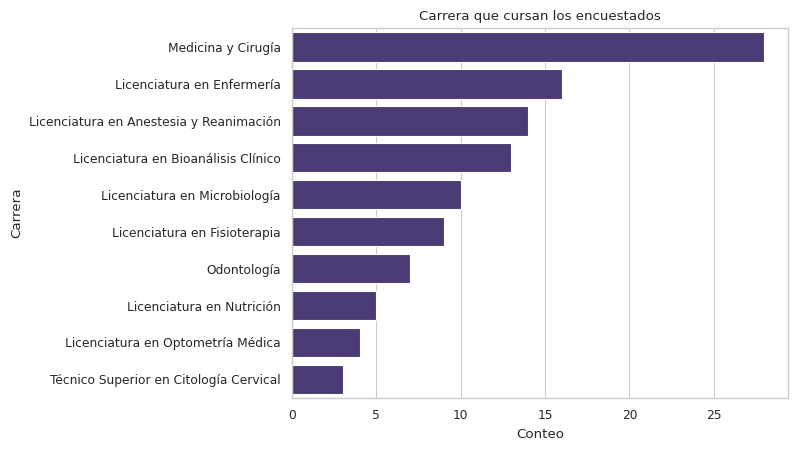

In [19]:
sns.countplot(
    data=data, 
    y='degree',
    order=data['degree'].value_counts().index
)
plt.title("Carrera que cursan los encuestados")
plt.ylabel("Carrera")
plt.xlabel("Conteo")

Text(0.5, 0, 'Conteo')

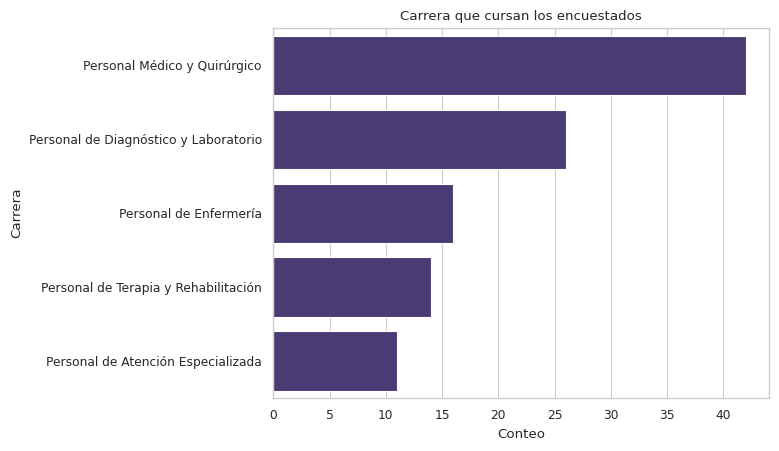

In [26]:
sns.countplot(
    data=data, 
    y='degree_category',
    order=data['degree_category'].value_counts().index
)
plt.title("Carrera que cursan los encuestados")
plt.ylabel("Carrera")
plt.xlabel("Conteo")

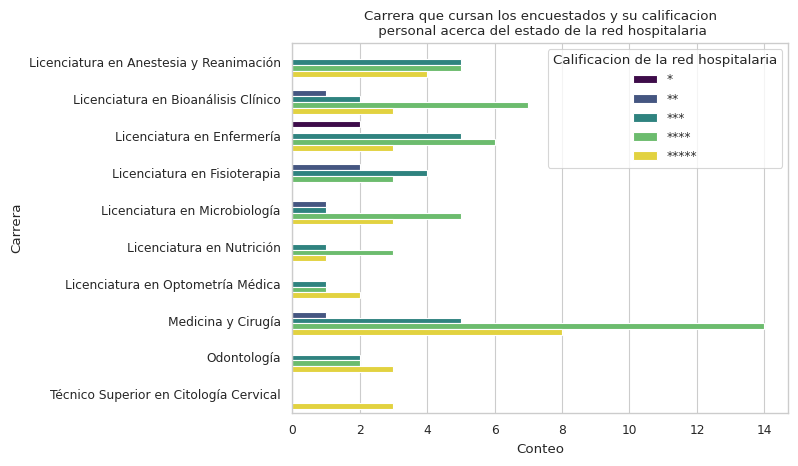

In [21]:
ax = sns.countplot(data=data, y='degree', hue='modernization_score', palette="viridis")
plt.title("Carrera que cursan los encuestados y su calificacion\n personal acerca del estado de la red hospitalaria")
plt.ylabel("Carrera")
plt.xlabel("Conteo")
ax.legend(
    title="Calificacion de la red hospitalaria",
    labels=[
        '*',
        '**',
        '***',
        '****',
        '*****'
    ]
)

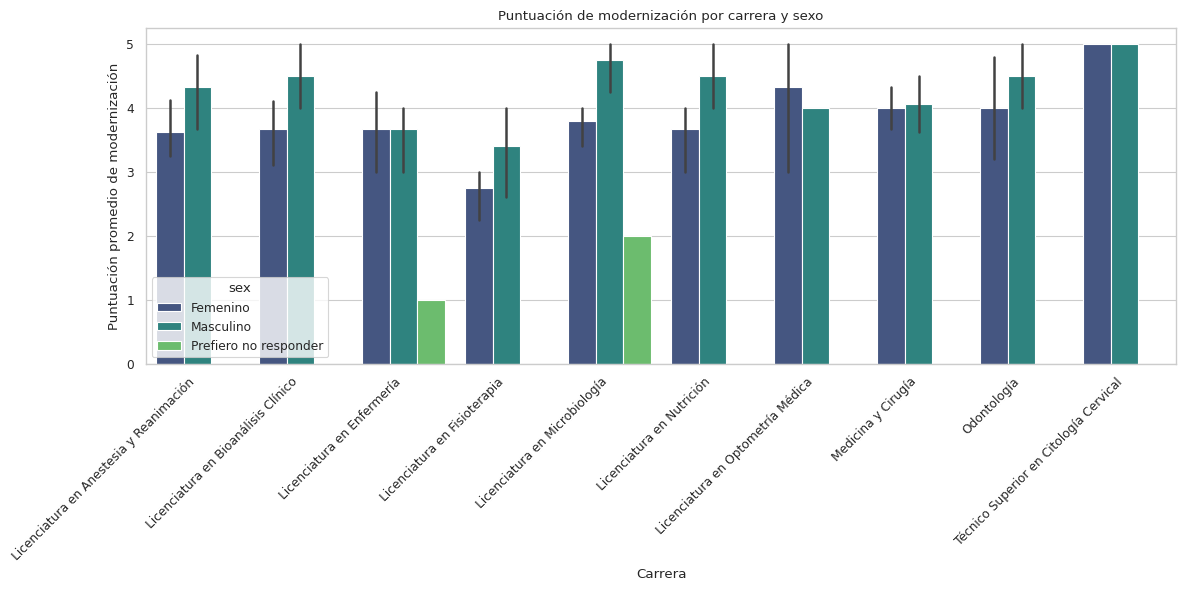

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='degree', y='modernization_score', hue='sex', palette='viridis')
plt.title('Puntuación de modernización por carrera y sexo')
plt.xlabel('Carrera')
plt.ylabel('Puntuación promedio de modernización')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()